# Seaborn

### Handy hints 

* Some of the plotting libraries we use need to communicate a lot of data to the browser. Depending on which version of Jupyter you are running, you may need to launch this notebook with a higher data rate limit: `jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000`

* In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with `type()`. Jupyter's tools for exploring objects and methods will also be useful: the `?` and `??` operators, and tab autocompletion.

## Setup 

In [7]:
import pandas as pd
import numpy as np

In [2]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
%matplotlib inline
from matplotlib import pyplot as plt

### Housing data 

In [3]:
sales = pd.read_csv("housing-data-10000.csv", 
                    usecols=['id','date','price','zipcode','lat','long',
                             'waterfront','view','grade','sqft_living','sqft_lot'],
                    parse_dates=['date'], 
                    dtype={'zipcode': 'category',
                           'waterfront': 'bool'})

# We'll add a count column that is just 1 for every sale - convenient for aggregating sale counts later
sales['count'] = 1

In [4]:
sales.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,grade,zipcode,lat,long,count
0,1446800660,2015-03-16,276500.0,1400,6650,False,0,6,98168,47.4888,-122.332,1
1,1453601502,2015-02-26,303697.0,2520,7334,False,0,7,98125,47.7263,-122.291,1
2,9523103990,2014-12-08,611000.0,1850,5000,False,0,7,98103,47.6727,-122.351,1
3,7308600040,2014-07-23,769995.0,3360,12080,False,0,9,98011,47.7757,-122.173,1
4,1562200240,2014-09-18,550000.0,2160,15360,False,0,8,98007,47.6232,-122.138,1


In [5]:
sales.dtypes

id                      int64
date           datetime64[ns]
price                 float64
sqft_living             int64
sqft_lot                int64
waterfront               bool
view                    int64
grade                   int64
zipcode              category
lat                   float64
long                  float64
count                   int64
dtype: object

Note that as well as specifying that the `date` field should be parsed as a date, we specified that certain variables are categorical (as opposed to integers). Some plotting commands understand pandas DataFrames and will treat categorical variables differently to numerical variables.

### Toy data 

In [8]:
from io import StringIO

data_string = """name	number	engine_type	colour	wheels	top_speed_mph	weight_tons
Thomas	1	Tank	Blue	6	40	52
Edward	2	Tender	Blue	14	70	41
Henry	3	Tender	Green	18	90	72.2
Gordon	4	Tender	Blue	18	100	91.35
James	5	Tender	Red	14	70	46
Percy	6	Tank	Green	4	40	22.85
Toby	7	Tank	Brown	6	20	27
Emily	12	Tender	Green	8	85	45
Rosie	37	Tank	Purple	6	65	37
Hiro	51	Tender	Black	20	55	76.8"""

trains = pd.read_table(StringIO(data_string))
trains['count'] = 1
trains['size'] = pd.cut(trains['weight_tons'], 3, labels=['Small','Medium','Big'])

trains

,name,number,engine_type,colour,wheels,top_speed_mph,weight_tons,count,size
0,Thomas,1,Tank,Blue,6,40,52.00,1,Medium
1,Edward,2,Tender,Blue,14,70,41.00,1,Small
2,Henry,3,Tender,Green,18,90,72.20,1,Big
3,Gordon,4,Tender,Blue,18,100,91.35,1,Big
4,James,5,Tender,Red,14,70,46.00,1,Medium
5,Percy,6,Tank,Green,4,40,22.85,1,Small
6,Toby,7,Tank,Brown,6,20,27.00,1,Small
7,Emily,12,Tender,Green,8,85,45.00,1,Small
8,Rosie,37,Tank,Purple,6,65,37.00,1,Small
9,Hiro,51,Tender,Black,20,55,76.80,1,Big


## Seaborn 

Seaborn builds on Matplotlib. Some nice features are:

- works directly with Pandas dataframes, concise syntax
- lots of plot types, including some more advanced options
- statistical plotting: many plots do summary statistics for you
- good default aesthetics and easy control of aesthetics
- using Matplotlib gives benefits of Matplotlib - many backends, lots of control
- underlying Matplotlib objects are easy to tweak directly

Be aware that Seaborn automatically changes Matplotlib's defaults *on import*. Not only your Seaborn plots, but also your Matplotlib plots, will look different once Seaborn is imported. If you don't want this behaviour, you can call `sns.reset_orig()` after import.

In [1]:
import seaborn as sns

### Seaborn and Pandas 

We can use Seaborn the way we used Matplotlib, passing in lists (or Series) directly:

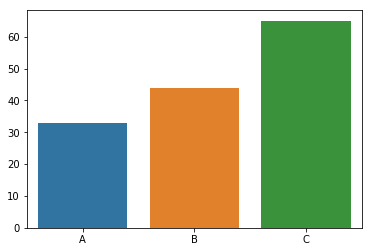

In [17]:
sns.barplot(x=['A','B','C'], y=[33,44,65])

However Seaborn is aware of Pandas and it is very common to use Seaborn directly with DataFrames. Plotting functions can take a DataFrame as their `data` parameter and then refer directly to column names:

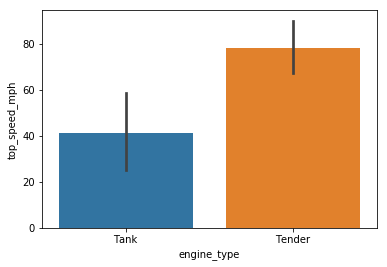

In [19]:
sns.barplot(data=trains, x='engine_type', y='top_speed_mph')

Here Seaborn has interpreted the `x` and `y` arguments as field names in the supplied DataFrame. Notice also that Seaborn has performed the summary statistics for us - in this case, using the default `estimator`, which is `mean()`. 

Notice also what happens if we simply swap the `x` and `y` parameters. Seaborn will automatically deduce that the categorical or string-like variable must be the bar labels, and the numeric variable must be the numeric axis:

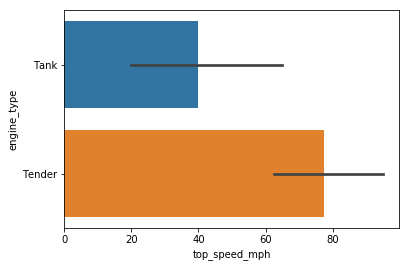

In [35]:
sns.barplot(data=trains, x='top_speed_mph', y='engine_type')

**Exercise:** create a (vertical) bar plot using the `sales` data, showing how house prices vary with the value of the property `grade`.

Bar plots are often deplored as a way of showing statistical estimates, as only the top of the bar is really important, and the bar itself is a visual distraction. A point plot is an alternative, and plots like box plots can show more information. Several other plot types also show distributional information within categories.

**Exercise:** reproduce the plot you just made, using instead each of the Seaborn functions:

- pointplot()
- boxplot()
- violinplot()  (try the `scale` parameter)
- lvplot()
- stripplot() [SEE WARNING]  (try the `jitter` parameter)
- swarmplot() [SEE WARNING]

Note what sort of information about the distribution is shown by each.

WARNING: `stripplot()` and `swarmplot()` will plot individual data points. There are too many house sales to easily display in this way - you may want to subsample the dataframe with e.g.  `data=sales.sample(100)`.

Let's try making a horizontal bar plot of `price` against `grade` by putting `grade` on the y axis:

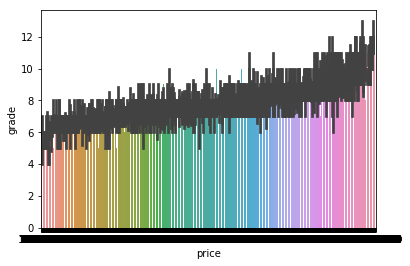

In [32]:
# WARNING: 
# Do not rerun this cell without modifying it!
# It will take a long time to run.
sns.barplot(data=sales, x='price', y='grade')

This is obviously not what we want.

Questions:
* What went wrong here?
* Can you fix it? (There are at least two sensible approaches.)

### Contexts and styles

Seaborn provides context managers which allow you to change the parameters for a plot. For instance,

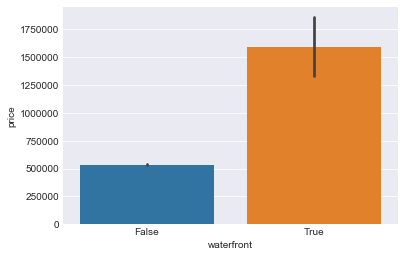

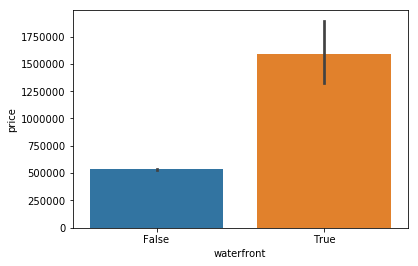

In [111]:
with sns.axes_style('darkgrid'):
    sns.barplot(data=sales, x='waterfront', y='price')
    plt.show()
# Now do it again, outside the context
sns.barplot(data=sales, x='waterfront', y='price')

The context manager functions are:

- `axes_style()`: set style parameters. Valid styles are "darkgrid", "whitegrid", "dark", "white", and "ticks".
- `plotting_context()`: set the scale of figure elements such as labels. Valid contexts are "notebook", "paper", "talk" and "poster".
- `color_palette()`: set colour palette. This is actually the function to create discrete colour palettes; it can be used as a context manager to set the default colour palette to the specified palette so that you need not pass it in to plotting functions.

Instead of using a context manager, you can set the corresponding parameters permanently using the three functions:

- `set_style()` instead of `axes_style()`
- `set_context()` instead of `plotting_context()`
- `set_palette()` instead of `color_palette()`

Exercise: redo your violinplot (or any other plot you like) with context "poster" and style "dark".

### Colour

Seaborn has good colour options. There are a few ways we could want to use access colours:

* Specify an individual colour for some plot element. Matplotlib named colours can be used, or rgb values specified. Also check out the `sns.xkcd_rgb` dictionary of 954 named colours from the XKCD colour survey - for instance, `sns.xkcd['fire engine red']` is a colour.
* Specify a colormap, for mapping a continuous value to colour. All Matplotlib colormaps can be used by name. You can see these under the `plt.cm` module. Seaborn's `light_palette()` and `dark_palette()` functions can also generate custom colourmaps easily.
* Specify a discrete colour palette (a list of colours), for mapping a discrete or categorical variable to colour. In Seaborn, there is a distinction between colour palettes and colormaps. In general, you can create a colour palette by explicitly listing some colours, or by selecting a series of colours along some colormap. There are several functions, including `color_palette()`, `light_palette()`, `dark_palette()`, `diverging_palette()` and `xkcd_palette()`, which can produce many discrete colour palettes of whatever size you need. 

[array([ 0.92878049,  0.94439024,  0.97121951,  1.        ]), array([ 0.8139133 ,  0.84762101,  0.90555614,  1.        ]), array([ 0.69631117,  0.74854774,  0.83832935,  1.        ]), array([ 0.57870905,  0.64947448,  0.77110256,  1.        ]), array([ 0.46384186,  0.55270524,  0.70543918,  1.        ]), array([ 0.34623974,  0.45363198,  0.63821239,  1.        ]), array([ 0.23137255,  0.35686275,  0.57254902,  1.        ])]


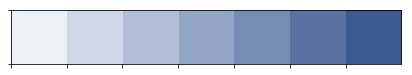

In [19]:
# An example discrete colour palette of 7 colours, based on the XKCD colour "denim blue"
# palplot is a function to visualise a palette
palette = sns.light_palette("denim blue", n_colors=7, input='xkcd')
print(palette)
sns.palplot(palette)

#3b5b92
[array([ 0.92878049,  0.94439024,  0.97121951,  1.        ]), array([ 0.8139133 ,  0.84762101,  0.90555614,  1.        ]), array([ 0.69631117,  0.74854774,  0.83832935,  1.        ]), array([ 0.57870905,  0.64947448,  0.77110256,  1.        ]), array([ 0.46384186,  0.55270524,  0.70543918,  1.        ]), array([ 0.34623974,  0.45363198,  0.63821239,  1.        ]), array([ 0.23137255,  0.35686275,  0.57254902,  1.        ])]


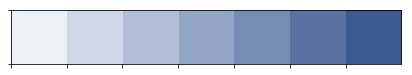

In [22]:
# Equivalently (to illustrate that we can use an rgb value directly)
denim_blue = sns.xkcd_rgb["denim blue"]
print(denim_blue)
palette = sns.light_palette(denim_blue, n_colors=7)
print(palette)
sns.palplot(palette)

**Exercise:** Try out the Seaborn function `choose_diverging_palette()` in your notebook (it requires no arguments). You can assign the result to a variable.

Let's try a heatmap. Unlike most Seaborn functions, heatmaps take data in wide form. We'll need to pivot our long-form data to get a table of numbers, indexed by two variables. The heatmap function will then transform each number to a colour via a continuous colourmap.

**Exercise:** Try to use `sales.pivot_table()` to produce a table showing average house prices. The x-axis (column headers) should be the values of the `grade` variable, and the rows (index) should be the values of the `view` variable. If you're new to Pandas, check the example below that uses the `trains` toy dataset.

In [60]:
# Here's an example using the toy dataset
# Avoid looking at the details first if you want to solve the above without hints!

speed_table = trains.pivot_table(index='engine_type', columns='size', values='top_speed_mph', aggfunc=np.mean)
speed_table

size,Small,Medium,Big
engine_type,,,
Tank,41.25,NaN,NaN
Tender,85.00,70.0,81.666667


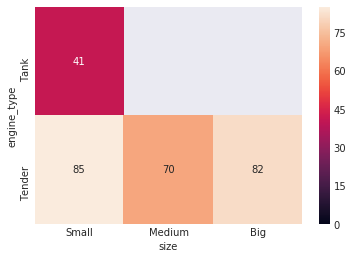

In [115]:
# we'll use a dark-background style so we can easily 
# distinguish the (transparent) null values from the default colourmap
with sns.axes_style('dark'):
    # vmin=0 starts our colour scale from zero, which makes sense for speeds
    sns.heatmap(speed_table, vmin=0, annot=True)

**Exercises:** 
* If you haven't already, produce a heatmap with the `sales` data as described above. You will probably want to leave off the annotations unless your plot is very large. 
* Specify a different colourmap using the `cmap` parameter to `heatmap`. An ascending (not diverging) colourmap is appropriate for prices that are all positive, but in the Jupyter notebook, it might be nice to pick a colourmap that is reversed so that the whiter colours are closer to zero. Matplotlib colourmaps ending in "_r" are reversed.
* House prices have a skewed distribution, and so our heatmap doesn't really show detail for the lower end of the scale. Try to plot a heatmap where colour is based on the *log* of the price. You can do this by just taking the log of the price, or - more difficult - you can pass a `matplotlib.colors.LogNorm` object to the underlying Matplotlib function, which will cause values to be normalised to (0,1) via a log rather than a linear function in the colormap. 

### Hue 

Many Seaborn plotting functions take a `hue` parameter. This colours the plot elements by some categorical variable, but more than this, summary statistics are calculated for each level of the hue variable.

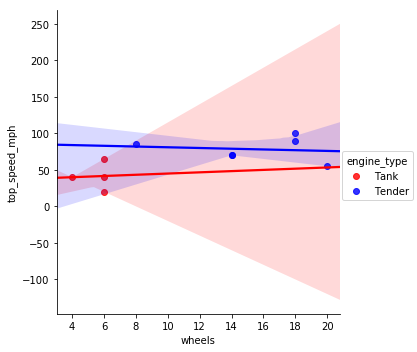

In [8]:
# It appears that my hypothesis that more wheels make you faster is flawed
sns.lmplot(data=trains, x='wheels', y='top_speed_mph', hue='engine_type', palette=['red', 'blue'])

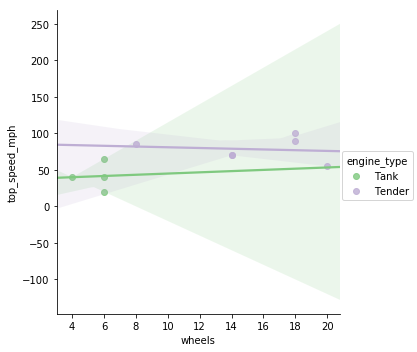

In [11]:
with sns.color_palette("Accent"):  # equivalent to parameter palette=color_palette('Reds')
    sns.lmplot(data=trains, x='wheels', y='top_speed_mph', hue='engine_type')

**Exercises:** 
* Create an `lmplot` of house price against living area. Do this without a `hue` parameter, then add in `waterfront` as the `hue` parameter. What information is the hue giving in this case?
* Try adding the `hue` parameter to one of your previous plots of some other type - for instance, a box plot.

If we'd wanted to colour scatter points by some continuous variable, `hue` can be made to work, but doesn't really make sense as it is intended for discrete values. In this specific case, we could pass our colour variable down to the underlying Matplotlib scatter call via the `scatter_kws` parameter. We'll look more at this later. Or, if we're not trying to fit a linear model, we could just use Seaborn aesthetics around a Matplot scatter plot:

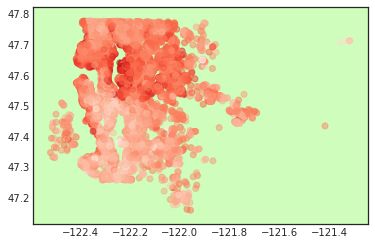

In [17]:
sample = sales.sample(200)

with sns.axes_style('white'):
    fig, ax = plt.subplots()
    ax.set_facecolor(sns.xkcd_rgb['very pale green'])
    ax.scatter(x=sales['long'], y=sales['lat'], c=sales['price'].apply(np.log), 
               alpha=0.5, cmap='Reds')

For discrete color palettes, as needed by the `hue` parameter, Seaborn has a `color_palette()` function to generate a useful range of palettes. You can find [a tutorial on choosing color palettes here](https://seaborn.pydata.org/tutorial/color_palettes.html). 

### Compound plots 

Seaborn has some plotting functions which create relatively complex figures made of multiple subplots. These include `pairplot()`, `factorplot()`, `jointplot()`, `lmplot()` and `clustermap()`. Let's see an example:

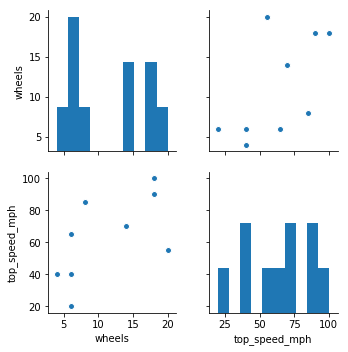

In [131]:
# Note that a variable like engine_type would be ignored as it is not numeric
sns.pairplot(data=trains[['wheels', 'top_speed_mph']])

Exercise: design a plot using sns.factorplot, to make clear the relationship between house price and (at least): grade, waterfront, and living area. Available channels of information are:
- x and y coordinates
- hue (or colormap)
- row and column of subplot in factorplot

Humans can spot relationshsips more easily in some of these channels than others, so more important variables should go in the clearer channels. At the same time, some channels can handle a large number of category levels more clearly than others.

You do not have to use all of these channels - in fact your plot may be difficult to take in if you do.

### Seaborn and Matplotlib 

Seaborn plotting functions call Matplotlib plotting functions, and we've already seen an example of passing keyword arguments down to the Matplotlib function via `scatter_kws` in `lmplot`. 

Let's look at the object returned by a Seaborn plot function.

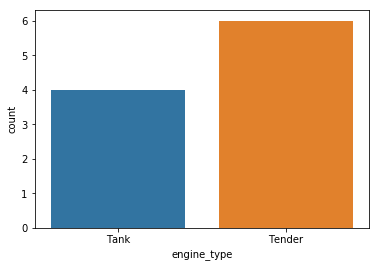

In [25]:
g = sns.countplot(trains['engine_type'])

In [26]:
type(g)

matplotlib.axes._subplots.AxesSubplot

This is a Matplotlib `Axes` object. We can use all the usual `Axes` methods to tweak the plot. What's more, if we have an existing `Axes` object, we can ask Seaborn to draw the plot onto it by passing it in as the `ax` parameter:

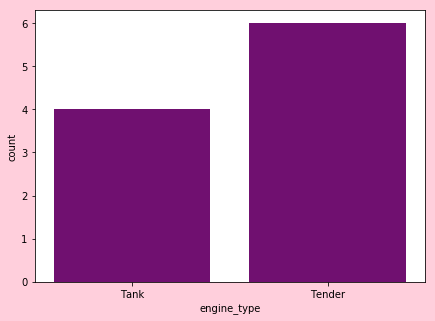

In [122]:
fig, myaxes = plt.subplots(figsize=(7,5), facecolor=sns.xkcd_rgb['pale pink'])

sns.countplot(trains['engine_type'], color='purple', ax=myaxes)

And the plot is still attached to `fig`:

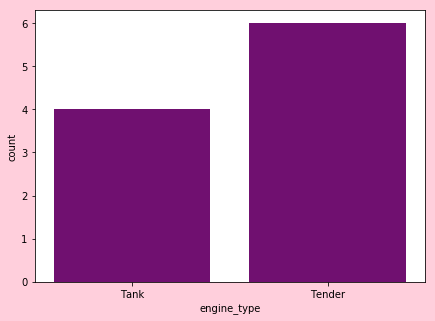

In [123]:
fig

The simpler Seaborn plotting functions return `Axes` objects, and can take an `Axes` as a parameter. More complex functions like `jointplot()` and `factorplot()` need to make multiple subplots. What do they return?

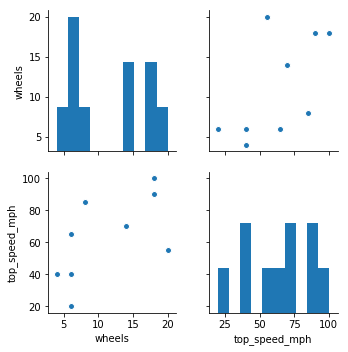

In [154]:
g = sns.pairplot(data=trains[['wheels', 'top_speed_mph']])

In [134]:
type(g)

seaborn.axisgrid.PairGrid

In [138]:
type(g.fig)

matplotlib.figure.Figure

In [156]:
g.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b127e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2c062780>]], dtype=object)

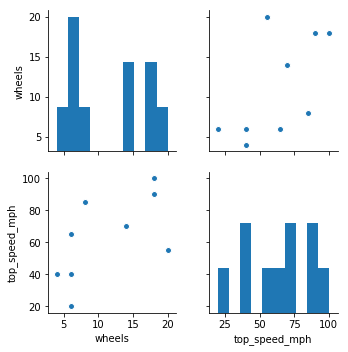

In [139]:
g.fig

As we can see, these more complex functions produce entire Matplotlib `Figure` objects, which can contain multiple `Axes`. The `Figure`, however, comes wrapped in a Seaborn class, which provides some convenient functions to manipulate the figure properties.

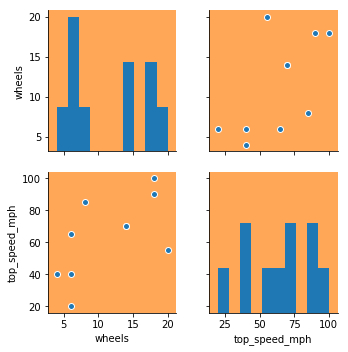

In [147]:
# g.set sets a property on all Axes in the Figure
g.set(facecolor=sns.xkcd_rgb['pale orange'])
g.fig

# TODO perhaps a more practical example

**Exercise:** Try out a few more of these complex plot types, using the `sales` dataset. Plot:
- `jointplot()` with `
- 

You can create custom plots by instantiating these classes yourself. The main reuseable classes  for these compound plots are:

- JointGrid : a central bivariate plot with two marginal univariate plots. Used by `jointplot()`. 
- PairGrid : a grid of subplots for plotting pairwise relationships. Has convenience functions for mapping plots onto diagonal and non-diagonal elements. Used by `pairplot()`.
- FacetGrid : a grid of subplots showing the same relationship, conditioned on some variable across different subplots. Designed to map fields of a Pandas DataFrame to different rows, columns, and hues. Used by `factorplot()` and `lmplot()`.